In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import spacy
from scipy.spatial import distance
import time
import glob
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
path = '/Users/ash/Downloads/NLP/data/bbc'
folders = glob.glob(path+'/*')

cat, text = [], []
for folder in folders: 
    files = glob.glob(folder+'/*.txt')
    for file in files:
        cat.append(folder[34:])
        content = open(file, encoding="utf8", errors='ignore')
        text.append(nlp(content.read()))

In [4]:
ent_vecs = [text[i] for i in range(len(text)) if (cat[i] == 'entertainment')]
busi_vecs = [text[i] for i in range(len(text)) if (cat[i] == 'business')]
poli_vecs = [text[i] for i in range(len(text)) if (cat[i] == 'politics')]
sport_vecs = [text[i] for i in range(len(text)) if (cat[i] == 'sport')]
tech_vecs = [text[i] for i in range(len(text)) if (cat[i] == 'tech')]

In [5]:
ent_sent_vecs = [sent.vector for doc in ent_vecs for sent in doc.sents]
ent_sent_labels = [0 for item in ent_sent_vecs]

busi_sent_vecs = [sent.vector for doc in busi_vecs for sent in doc.sents]
busi_sent_labels = [1 for item in busi_sent_vecs]

poli_sent_vecs = [sent.vector for doc in poli_vecs for sent in doc.sents]
poli_sent_labels = [2 for item in poli_sent_vecs]

sport_sent_vecs = [sent.vector for doc in sport_vecs for sent in doc.sents]
sport_sent_labels = [3 for item in sport_sent_vecs]

tech_sent_vecs = [sent.vector for doc in tech_vecs for sent in doc.sents]
tech_sent_labels = [4 for item in tech_sent_vecs]

In [6]:
a = len(ent_sent_vecs)
b = len(busi_sent_vecs)
c = len(poli_sent_vecs)
d = len(sport_sent_vecs)
e = len(tech_sent_vecs)

all_vecs = ent_sent_vecs[:a] + busi_sent_vecs[:b] + poli_sent_vecs[:c] + sport_sent_vecs[:d] + tech_sent_vecs[:e]
all_labels = ent_sent_labels[:a] + busi_sent_labels[:b] + poli_sent_labels[:c] + sport_sent_labels[:d] + tech_sent_labels[:e]

In [ ]:
# %matplotlib inline
# mat = np.array(all_vecs)
# sne = TSNE(n_components=2)
# trans = sne.fit_transform(mat)

# labels = all_labels
# fig, ax = plt.subplots(figsize=(12,8))
# ax.scatter(trans[:,0], trans[:, 1], c=labels, alpha=0.6)
# plt.show()

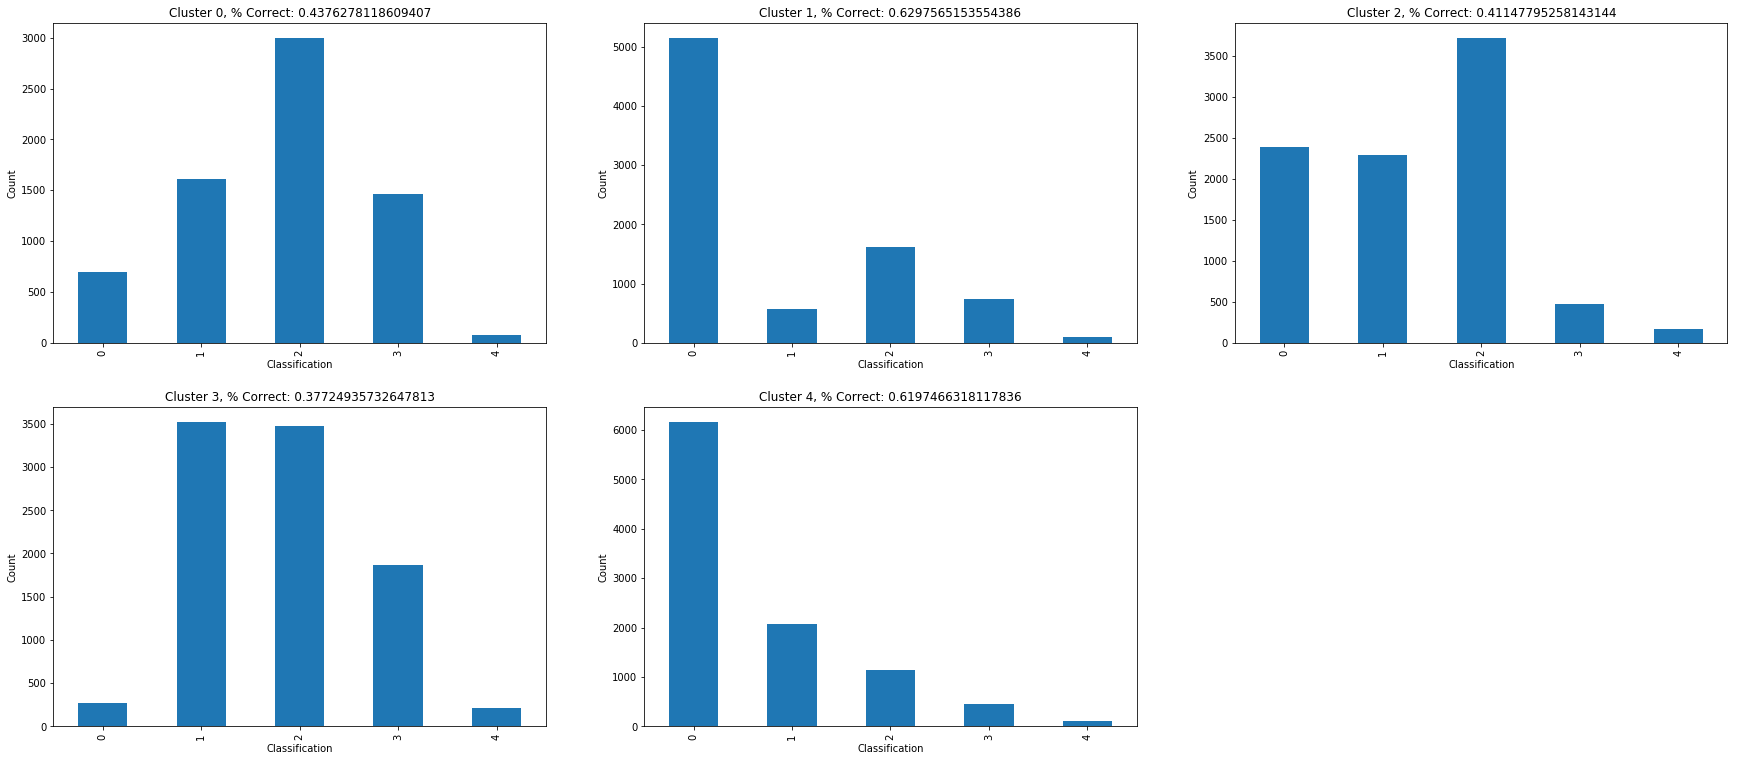

In [57]:
def visualize_cluster_results(count):
    plt.figure(figsize = (30,20))
    for cluster in range(5):
        zeros = count.loc[cluster]['dumb']
        plt.subplot(3,3, cluster+1)
        zeros.plot(kind='bar')
        plt.xlabel('Classification')
        plt.ylabel('Count')
        plt.title('Cluster {}, % Correct: {}'.format(cluster,max(zeros)/sum(zeros)))

labels = all_labels
clusterer = KMeans(5)
clusterer.fit(all_vecs)

preds = clusterer.predict(all_vecs)
dumb = range(len(labels))
data = {'label': labels, 'pred': preds, 'dumb':dumb}

data = pd.DataFrame(data)
counts = data.groupby(['label', 'pred']).count()
visualize_cluster_results(counts)

In [7]:
from sklearn.model_selection import train_test_split

data = pd.DataFrame(all_vecs)
labels = pd.DataFrame(all_labels)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=25)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

assert len(X_train) == len(y_train)
print('Size of training set: ', len(X_train))

assert len(X_val) == len(y_val)
print('Size of validation set: ', len(X_val))

assert len(X_train) == len(y_train)
print('Size of test set: ', len(X_test))

Size of training set:  27728
Size of validation set:  6933
Size of test set:  8666


In [11]:
# names = ['X_train', 'X_val', 'X_test', 'y_train', 'y_val', 'y_test']
# i=0
# for data in [X_train, X_val, X_test, y_train, y_val, y_test]:
#     data.to_csv('/Users/ash/Downloads/temp_data/{}.csv'.format(names[i]), index=False)
#     i += 1

In [13]:
from sklearn.svm import SVC, LinearSVC

clf_svm_linear = LinearSVC()
clf_svm_linear.fit(X_train, y_train)

/Users/ash/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
preds = clf_svm_linear.predict(X_train)

print('Classification_report:\n')
print(classification_report(y_train[0], preds))
mat = pd.DataFrame(confusion_matrix(y_train[0], preds), columns=range(5))
print('Confusion matrix:\n', mat)
print('Accuracy score:', accuracy_score(y_train[0], preds))

Classification_report:

              precision    recall  f1-score   support

           0       0.83      0.76      0.80      4378
           1       0.84      0.81      0.83      5250
           2       0.80      0.80      0.80      5770
           3       0.82      0.92      0.86      5945
           4       0.85      0.83      0.84      6385

   micro avg       0.83      0.83      0.83     27728
   macro avg       0.83      0.82      0.83     27728
weighted avg       0.83      0.83      0.83     27728

Confusion matrix:
       0     1     2     3     4
0  3341   111   278   371   277
1    81  4274   433   194   268
2   191   341  4619   370   249
3   145    73   166  5446   115
4   266   285   274   275  5285
Accuracy score: 0.8282241777264858


In [59]:
preds = clf_svm_linear.predict(X_val)

print('Classification_report:\n')
print(classification_report(y_val[0], preds))
mat = pd.DataFrame(confusion_matrix(y_val[0], preds), columns=range(5))
print('Confusion matrix:\n', mat)
print('Accuracy score:', accuracy_score(y_val[0], preds))

Classification_report:

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1120
           1       0.83      0.79      0.81      1326
           2       0.77      0.79      0.78      1399
           3       0.80      0.92      0.86      1495
           4       0.84      0.81      0.83      1593

   micro avg       0.81      0.81      0.81      6933
   macro avg       0.81      0.81      0.81      6933
weighted avg       0.81      0.81      0.81      6933

Confusion matrix:
      0     1     2     3     4
0  815    30    82   114    79
1   29  1044   118    62    73
2   45   101  1100    95    58
3   35    17    45  1368    30
4   80    68    85    66  1294
Accuracy score: 0.8107601326986874


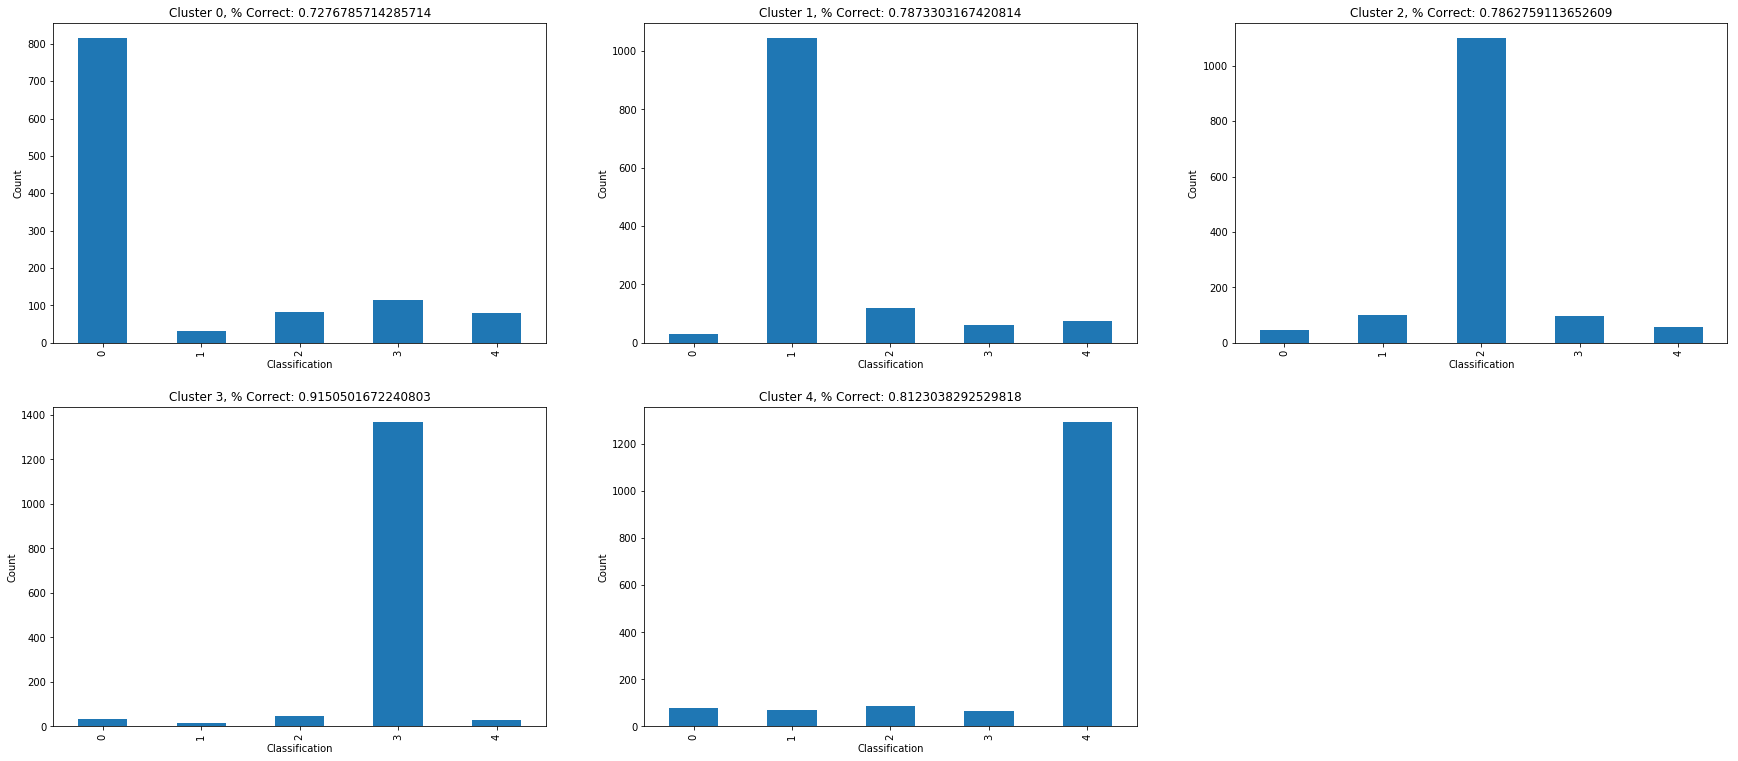

In [60]:
labels = y_val[0]

dumb = range(len(labels))
data = {'label': labels, 'pred': preds, 'dumb':dumb}

data = pd.DataFrame(data)
counts = data.groupby(['label', 'pred']).count()
visualize_cluster_results(counts)

In [44]:
from sklearn.ensemble import RandomForestClassifier 

clf_forest = RandomForestClassifier(criterion='gini',
            max_depth=10, max_features='auto', n_estimators=100, random_state=0)

clf_forest.fit(X_train, y_train)

/Users/ash/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [45]:
preds = clf_forest.predict(X_train)

print('Classification_report:\n')
print(classification_report(y_train[0], preds))
mat = pd.DataFrame(confusion_matrix(y_train[0], preds), columns=range(5))
print('Confusion matrix:\n', mat)
print('Accuracy score:', accuracy_score(y_train[0], preds))

Classification_report:

              precision    recall  f1-score   support

           0       0.96      0.80      0.87      4378
           1       0.92      0.85      0.88      5250
           2       0.84      0.89      0.87      5770
           3       0.85      0.96      0.90      5945
           4       0.91      0.91      0.91      6385

   micro avg       0.89      0.89      0.89     27728
   macro avg       0.90      0.88      0.89     27728
weighted avg       0.89      0.89      0.89     27728

Confusion matrix:
       0     1     2     3     4
0  3490    84   221   360   223
1    27  4443   462   152   166
2    38   177  5155   287   113
3    11    21   147  5716    50
4    71    87   158   235  5834
Accuracy score: 0.8885603000577034


In [54]:
preds = clf_forest.predict(X_val)

print('Classification_report:\n')
print(classification_report(y_val[0], preds))
mat = pd.DataFrame(confusion_matrix(y_val[0], preds), columns=range(5))
print('Confusion matrix:\n', mat)
print('Accuracy score:', accuracy_score(y_val[0], preds))

Classification_report:

              precision    recall  f1-score   support

           0       0.83      0.53      0.65      1120
           1       0.78      0.69      0.73      1326
           2       0.68      0.72      0.70      1399
           3       0.72      0.89      0.79      1495
           4       0.76      0.81      0.78      1593

   micro avg       0.74      0.74      0.74      6933
   macro avg       0.75      0.73      0.73      6933
weighted avg       0.75      0.74      0.74      6933

Confusion matrix:
      0    1     2     3     4
0  598   57   129   204   132
1   11  915   197    74   129
2   30  123  1007   149    90
3   27    8    74  1326    60
4   54   69    84    94  1292
Accuracy score: 0.7410933217943171


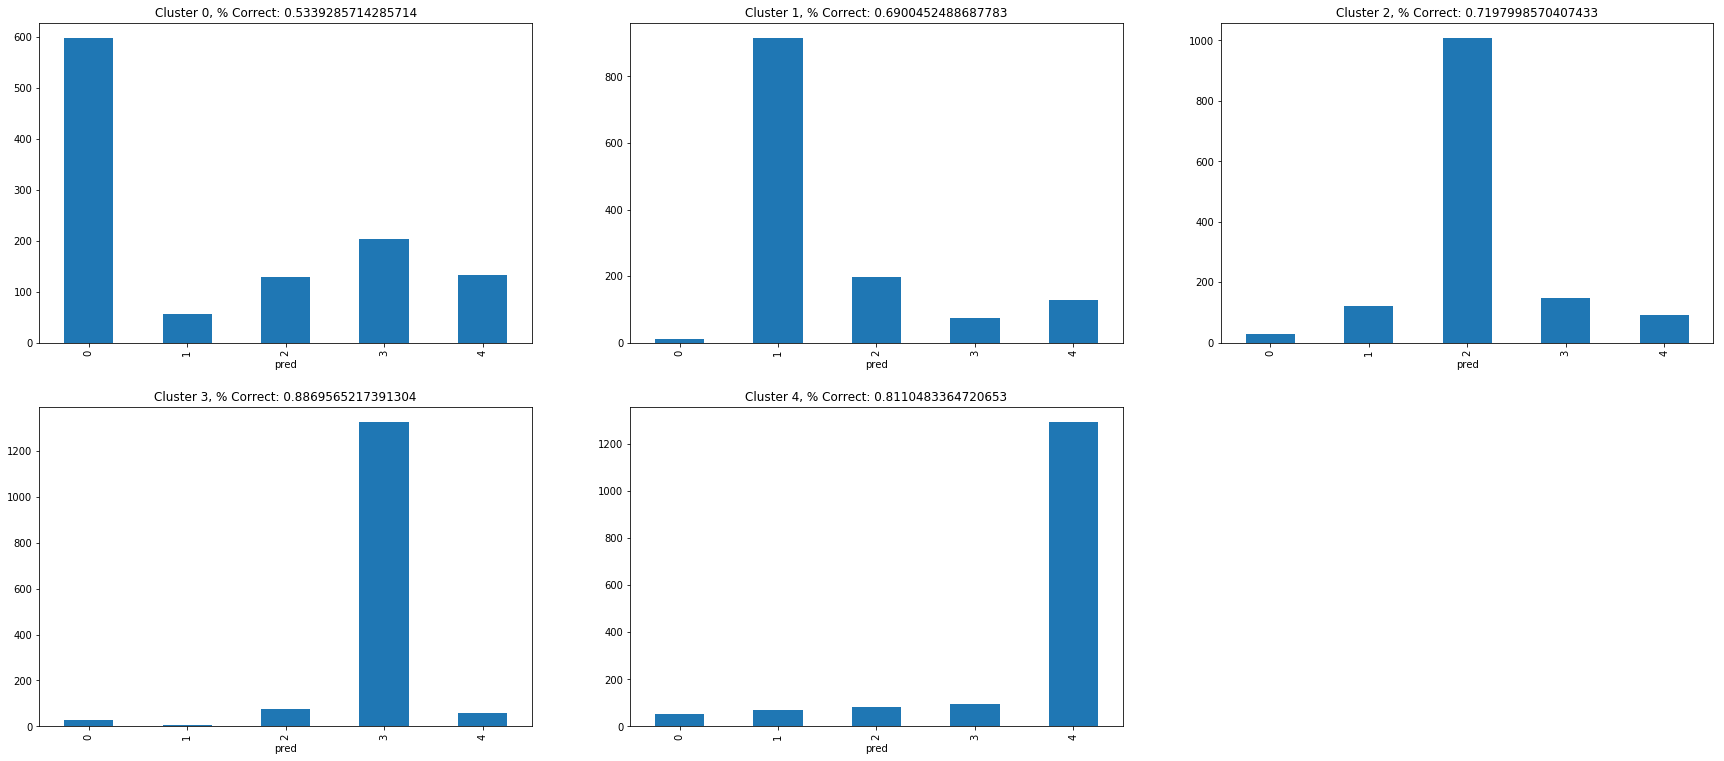

In [56]:
labels = y_val[0]

dumb = range(len(labels))
data = {'label': labels, 'pred': preds, 'dumb':dumb}

data = pd.DataFrame(data)
counts = data.groupby(['label', 'pred']).count()
visualize_cluster_results(counts)